## Iris Flower Dataset

#### Using SVM and Grid Search

Fischer's Iris Flower Dataset is a part of Seaborn package in Python

This dataset has 3 species of Iris- Iris Setosa, Iris Virginica, Iris Versicolor

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
iris = sns.load_dataset('iris')

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [14]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


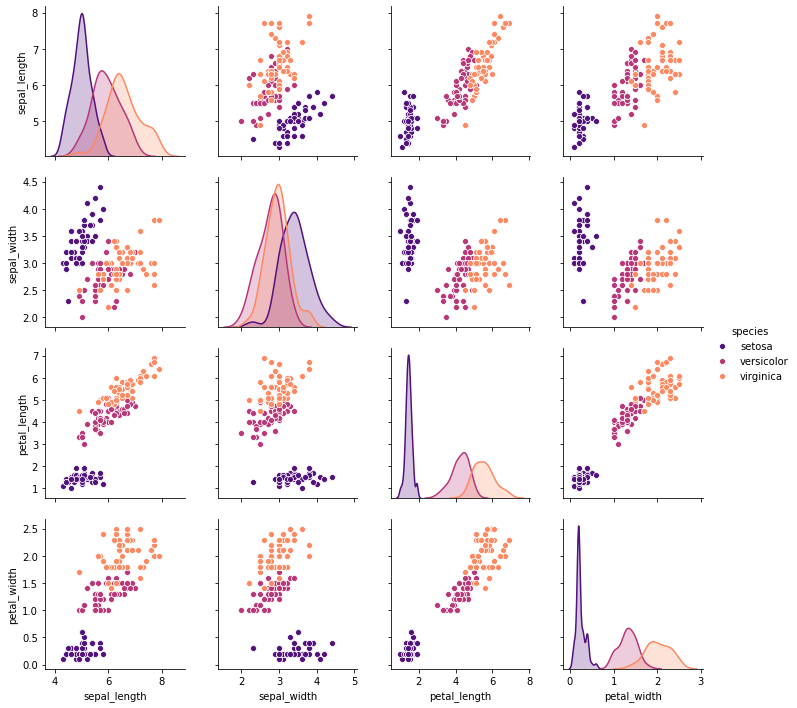

In [15]:
sns.pairplot(data=iris, hue='species', palette='magma')

# Setosa is most separable species

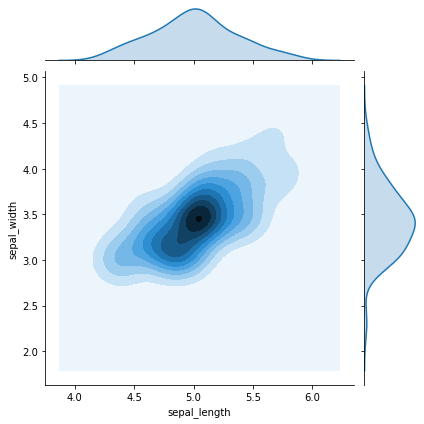

In [23]:
#  Sepal length vs Sepal width for Setosa species

sns.jointplot(x='sepal_width',y='sepal_length',data=iris[iris['species']=='setosa'],kind='kde',palette='magma')
# Above command is incorrect for kde. Instead use sns.kdeplot


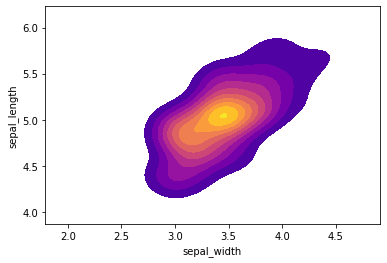

In [24]:
setosa = iris[iris['species'] == 'setosa']

sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma'
            ,shade=True,shade_lowest=False)

##### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = iris.drop('species',axis=1)
y = iris['species']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

##### Scaler Vector Machines Method

In [28]:
from sklearn.svm import SVC

In [29]:
svc_model = SVC()

In [30]:
svc_model.fit(X_train, y_train)

/Users/AbhinavPrasad/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
predictions = svc_model.predict(X_test)

##### Model Evaluation for SVM 

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print('Model Evaluation for SCALER VECTOR MACHINES')
print('\n Confusion Matrix: \n')
print(confusion_matrix(y_test, predictions))
print('\n Classification Report: \n')
print(classification_report(y_test,predictions))

Model Evaluation for SCALER VECTOR MACHINES

 Confusion Matrix: 

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]

 Classification Report: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



###### So as we can see the SVM model was actually good! 
Let's still try with GridSearch to see if there's even better result

##### GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
# Filling in some parameters 

param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}

In [37]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)


In [38]:
grid.fit(X_train,y_train)

/Users/AbhinavPrasad/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
/Users/AbhinavPrasad/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [40]:
grid.best_params_

# if we look up in SVM fit, that model used C=1. That's we got better results with that

{'C': 1, 'gamma': 0.1}

In [41]:
grid_predictions = grid.predict(X_test)

##### Model Evaluation for GridSearch

In [42]:
print('Model Evaluation for SCALER VECTOR MACHINES')
print('\n Confusion Matrix: \n')
print(confusion_matrix(y_test, grid_predictions))
print('\n Classification Report: \n')
print(classification_report(y_test,grid_predictions))

Model Evaluation for SCALER VECTOR MACHINES

 Confusion Matrix: 

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]

 Classification Report: 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



The results almost matches with the SVM model